# Домашнее задание № 2, Кривоногов Н.В.

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Генерация датасета и масштабирование признаков:

In [2]:
# сгенерирую набор данных:

X, Y, coef = datasets.make_regression(n_samples=10000, n_features=8, n_informative=4, n_targets=1, 
                                      noise=6, coef=True, random_state=42)
X[:, 0] *= 10
display(X, Y, coef)

array([[-2.63517488e+00, -1.94227609e-01, -3.00651018e-01, ...,
         3.68649105e-03,  1.02164358e-01, -8.55672468e-01],
       [-2.14527924e+00, -2.05058762e-01,  5.78282510e-01, ...,
         8.21585842e-01,  1.18900297e+00,  6.14952051e-01],
       [-1.33297624e+01, -9.70187637e-01,  9.56249150e-01, ...,
         3.89184674e-01,  1.69134960e+00,  4.75056731e-01],
       ...,
       [-1.58755675e+01,  8.07255428e-01,  1.23495931e-01, ...,
         1.40742494e-01,  2.25551698e+00,  7.35793054e-01],
       [ 4.66271260e+00,  1.40303343e+00,  1.79497864e+00, ...,
        -6.26940636e-01,  1.66249877e+00,  1.09012062e+00],
       [-2.60679997e+01,  4.40261373e-01,  2.48677234e+00, ...,
         4.34703067e-01,  2.10490264e-01, -9.70913966e-02]])

array([ 20.48301797, 243.54426725,  95.87279015, ..., 125.63170586,
        -6.18418528,  21.00111381])

array([ 0.        ,  3.66507269,  0.        , 90.01220329,  0.        ,
       32.15627061, 32.4082865 ,  0.        ])

In [3]:
# получаю средние значения и стандартное отклонение по столбцам: 

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву

display(means, stds)

array([ 0.0839154 , -0.00361983,  0.0053567 , -0.00709074,  0.00025014,
        0.00870873,  0.00039231, -0.00272245])

array([10.01585521,  1.01727907,  1.00157068,  0.99695958,  0.9962684 ,
        1.0003933 ,  1.00079387,  0.99489792])

In [4]:
# вычитаю каждое значение признака из среднего и делю на стандартное отклонение: 

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [5]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)
# видно, что среднее максимально стремится к нулю, отклонение в единице

array([ 1.96731520e-17, -8.43991543e-17,  1.95399252e-18,  1.85768068e-17,
        8.82849349e-17,  2.86826118e-17, -4.59465799e-17, -3.13776782e-17])

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
# реализую функцию, определяющую среднеквадратичную ошибку: 

def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Реализация градиентного спуска:

In [7]:
np.random.seed(1234)

# в моем датасете 2 признака и 1000 объектов: 
n_features = X.shape[1]
n_objects = X.shape[0]

# генерирую вектор истинных весов: 
w_true = np.random.normal(size=(n_features))

# возьму нулевые начальные веса: 
w = np.zeros(n_features)

In [8]:
display(w, w_true, X, Y)

array([0., 0., 0., 0., 0., 0., 0., 0.])

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ])

array([[-0.27147859, -0.1873702 , -0.30552783, ..., -0.00502027,
         0.10169132, -0.85732415],
       [-0.22256658, -0.19801738,  0.57202734, ...,  0.81255753,
         1.18766781,  0.62084208],
       [-1.33924438, -0.9501501 ,  0.94940124, ...,  0.38032636,
         1.68961597,  0.48022935],
       ...,
       [-1.59342188,  0.79710208,  0.11795396, ...,  0.13198185,
         2.25333583,  0.74230279],
       [ 0.45715489,  1.38276044,  1.78681542, ..., -0.63539946,
         1.66078802,  1.09844743],
       [-2.61105164,  0.43634163,  2.47752424, ...,  0.42582686,
         0.2099313 , -0.0948529 ]])

array([ 20.48301797, 243.54426725,  95.87279015, ..., 125.63170586,
        -6.18418528,  21.00111381])

In [9]:
# вычисляю вектор весов по нормальному уравнению линейной регрессии: 

normal_eq_w = np.linalg.inv(np.dot(X.T, X)) @ X.T @ Y
print(f'Веса {normal_eq_w}')
print(f'В случае использования нормального уравнения функционал ошибки составляет ', end='')
print(f'{round(mserror(X, normal_eq_w, Y), 4)}')

Веса [-1.20643704e-03  3.71720530e+00  3.73517346e-02  8.97162514e+01
  9.47628105e-02  3.20945848e+01  3.23875421e+01  4.15276401e-04]
В случае использования нормального уравнения функционал ошибки составляет 36.1975


In [10]:
# возьму нулевые начальные веса
w = np.zeros(n_features)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_gd = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# задаю начальную разницу весов большим числом (+бесконечность)
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors_gd.append(error)
    
    print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_gd[-1], 4)}')

Iter 0: error - 9733.099521256452, weights: [ 1.14227002e-02  7.72480200e-02 -8.68642466e-03  1.79371445e+00
 -8.54768280e-03  6.23624071e-01  6.38256865e-01  1.03940492e-03]
Iter 1: error - 9350.801823688418, weights: [ 2.23833879e-02  1.52889208e-01 -1.70116066e-02  3.55156424e+00
 -1.67119554e-02  1.23513487e+00  1.26392859e+00  2.04239526e-03]
Iter 2: error - 8983.578602910902, weights: [ 3.28960680e-02  2.26957015e-01 -2.49865033e-02  5.27426652e+00
 -2.45048096e-02  1.83476760e+00  1.87726348e+00  3.00991538e-03]
Iter 3: error - 8630.835354526407, weights: [ 4.29743681e-02  2.99484194e-01 -3.26217788e-02  6.96252410e+00
 -3.19379094e-02  2.42275289e+00  2.47850492e+00  3.94288827e-03]
Iter 4: error - 8292.00102401327, weights: [ 5.26315481e-02  3.70502818e-01 -3.99278106e-02  8.61702575e+00
 -3.90225992e-02  2.99931690e+00  3.06789151e+00  4.84221603e-03]
Iter 5: error - 7966.52708160318, weights: [ 6.18805094e-02  4.40044289e-01 -4.69146977e-02  1.02384464e+01
 -4.57699120e-02  

Iter 53: error - 1186.9015768733843, weights: [ 2.08760286e-01  2.52045778e+00 -1.50422158e-01  5.95681134e+01
 -1.28574494e-01  2.09728284e+01  2.13279283e+01  2.18910437e-02]
Iter 54: error - 1141.5516265929252, weights: [ 2.08320872e-01  2.54529834e+00 -1.49859484e-01  6.01708239e+01
 -1.27550175e-01  2.11890110e+01  2.15457475e+01  2.19020794e-02]
Iter 55: error - 1097.989238192796, weights: [ 2.07813513e-01  2.56962272e+00 -1.49244697e-01  6.07614844e+01
 -1.26476332e-01  2.14009928e+01  2.17592744e+01  2.19058265e-02]
Iter 56: error - 1056.1439396422936, weights: [ 2.07241133e-01  2.59344165e+00 -1.48580099e-01  6.13403359e+01
 -1.25355379e-01  2.16088554e+01  2.19685937e+01  2.19025385e-02]
Iter 57: error - 1015.9480376274098, weights: [ 2.06606568e-01  2.61676564e+00 -1.47867921e-01  6.19076143e+01
 -1.24189654e-01  2.18126789e+01  2.21737883e+01  2.18924622e-02]
Iter 58: error - 977.3365079675976, weights: [ 2.05912562e-01  2.63960500e+00 -1.47110322e-01  6.24635513e+01
 -1.22

Iter 118: error - 120.56353030258525, weights: [ 1.21451564e-01  3.41074749e+00 -7.04192622e-02  8.16024888e+01
 -2.60515517e-02  2.89903990e+01  2.93507569e+01  1.50814174e-02]
Iter 119: error - 117.24005627753364, weights: [ 1.19982466e-01  3.41709789e+00 -6.91324175e-02  8.17646815e+01
 -2.45409103e-02  2.90507613e+01  2.94105249e+01  1.49384027e-02]
Iter 120: error - 114.04752675183369, weights: [ 1.18522660e-01  3.42331652e+00 -6.78541033e-02  8.19236317e+01
 -2.30420712e-02  2.91099500e+01  2.94691160e+01  1.47957332e-02]
Iter 121: error - 110.98078168902452, weights: [ 1.17072370e-01  3.42940612e+00 -6.65844905e-02  8.20794044e+01
 -2.15551728e-02  2.91679882e+01  2.95265534e+01  1.46534429e-02]
Iter 122: error - 108.03486442368778, weights: [ 1.15631809e-01  3.43536937e+00 -6.53237394e-02  8.22320629e+01
 -2.00803430e-02  2.92248981e+01  2.95828597e+01  1.45115644e-02]
Iter 123: error - 105.20501364473297, weights: [ 1.14201174e-01  3.44120889e+00 -6.40720008e-02  8.23816697e+0

Iter 190: error - 40.87211778419263, weights: [ 4.40620121e-02  3.64923710e+00 -2.82264905e-03  8.78201783e+01
  5.11987388e-02  3.13398496e+01  3.16612928e+01  6.72861489e-03]
Iter 191: error - 40.688055865480905, weights: [ 4.33794459e-02  3.65064241e+00 -2.22512208e-03  8.78580768e+01
  5.18635207e-02  3.13545314e+01  3.16755759e+01  6.64608841e-03]
Iter 192: error - 40.51124250912756, weights: [ 4.27059806e-02  3.65201862e+00 -1.63547386e-03  8.78952178e+01
  5.25192024e-02  3.13689277e+01  3.16895780e+01  6.56445845e-03]
Iter 193: error - 40.341392212888294, weights: [ 4.20415269e-02  3.65336633e+00 -1.05362741e-03  8.79316163e+01
  5.31658809e-02  3.13830440e+01  3.17033045e+01  6.48371983e-03]
Iter 194: error - 40.17823072152998, weights: [ 4.13859957e-02  3.65468614e+00 -4.79505713e-04  8.79672873e+01
  5.38036525e-02  3.13968858e+01  3.17167610e+01  6.40386726e-03]
Iter 195: error - 40.02149458369534, weights: [4.07392977e-02 3.65597861e+00 8.69682808e-05 8.80022452e+01
 5.443

Iter 252: error - 36.5850423872177, weights: [1.57049810e-02 3.69856942e+00 2.21193811e-02 8.91739684e+01
 7.86164184e-02 3.18713514e+01 3.21755050e+01 3.07920631e-03]
Iter 253: error - 36.56978941506759, weights: [1.54287190e-02 3.69895387e+00 2.23642445e-02 8.91848067e+01
 7.88814905e-02 3.18756952e+01 3.21796726e+01 3.04066068e-03]
Iter 254: error - 36.55513687790198, weights: [1.51567160e-02 3.69933039e+00 2.26053904e-02 8.91954283e+01
 7.91424360e-02 3.18799545e+01 3.21837583e+01 3.00262743e-03]
Iter 255: error - 36.54106113576643, weights: [1.48889127e-02 3.69969912e+00 2.28428701e-02 8.92058376e+01
 7.93993136e-02 3.18841310e+01 3.21877636e+01 2.96510077e-03]
Iter 256: error - 36.5275394795925, weights: [1.46252505e-02 3.70006023e+00 2.30767338e-02 8.92160388e+01
 7.96521813e-02 3.18882262e+01 3.21916902e+01 2.92807499e-03]
Iter 257: error - 36.514550094536304, weights: [1.43656713e-02 3.70041387e+00 2.33070316e-02 8.92260362e+01
 7.99010963e-02 3.18922417e+01 3.21955395e+01 2.8

Iter 318: error - 36.22489684319569, weights: [4.33535380e-03 3.71248870e+00 3.22657043e-02 8.95731740e+01
 8.94900892e-02 3.20335709e+01 3.23303166e+01 1.40058730e-03]
Iter 319: error - 36.22381925147656, weights: [4.24037467e-03 3.71258574e+00 3.23513656e-02 8.95760334e+01
 8.95806001e-02 3.20347585e+01 3.23314407e+01 1.38542133e-03]
Iter 320: error - 36.22278406108543, weights: [4.14697092e-03 3.71268078e+00 3.24356300e-02 8.95788356e+01
 8.96696040e-02 3.20359229e+01 3.23325427e+01 1.37047788e-03]
Iter 321: error - 36.22178960334131, weights: [4.05511766e-03 3.71277386e+00 3.25185193e-02 8.95815818e+01
 8.97571250e-02 3.20370648e+01 3.23336230e+01 1.35575392e-03]
Iter 322: error - 36.22083427524328, weights: [3.96479037e-03 3.71286502e+00 3.26000549e-02 8.95842731e+01
 8.98431867e-02 3.20381843e+01 3.23346822e+01 1.34124645e-03]
Iter 323: error - 36.21991653688581, weights: [3.87596488e-03 3.71295430e+00 3.26802577e-02 8.95869107e+01
 8.99278123e-02 3.20392821e+01 3.23357205e+01 1.

Iter 389: error - 36.19909236172872, weights: [3.83300273e-04 3.71612472e+00 3.58596267e-02 8.96821219e+01
 9.32512385e-02 3.20794751e+01 3.23735445e+01 7.34679685e-04]
Iter 390: error - 36.19902999901825, weights: [3.55161302e-04 3.71614688e+00 3.58855537e-02 8.96828039e+01
 9.32779831e-02 3.20797693e+01 3.23738193e+01 7.29550542e-04]
Iter 391: error - 36.198970089045076, weights: [3.27510306e-04 3.71616858e+00 3.59110392e-02 8.96834723e+01
 9.33042635e-02 3.20800577e+01 3.23740887e+01 7.24501315e-04]
Iter 392: error - 36.1989125353277, weights: [3.00339054e-04 3.71618984e+00 3.59360904e-02 8.96841273e+01
 9.33300875e-02 3.20803406e+01 3.23743528e+01 7.19530811e-04]
Iter 393: error - 36.19885724518039, weights: [2.73639449e-04 3.71621066e+00 3.59607147e-02 8.96847693e+01
 9.33554629e-02 3.20806179e+01 3.23746117e+01 7.14637853e-04]
Iter 394: error - 36.19880412956332, weights: [2.47403528e-04 3.71623105e+00 3.59849189e-02 8.96853984e+01
 9.33803974e-02 3.20808898e+01 3.23748655e+01 7.

Iter 446: error - 36.19766768212801, weights: [-6.37516132e-04  3.71687301e+00  3.68073084e-02  8.97054505e+01
  9.42213219e-02  3.20896587e+01  3.23830197e+01  5.40741297e-04]
Iter 447: error - 36.19766134585989, weights: [-6.47769939e-04  3.71687980e+00  3.68169338e-02  8.97056663e+01
  9.42310668e-02  3.20897547e+01  3.23831084e+01  5.38677176e-04]
Iter 448: error - 36.197655258706995, weights: [-6.57841700e-04  3.71688646e+00  3.68263915e-02  8.97058778e+01
  9.42406388e-02  3.20898487e+01  3.23831954e+01  5.36646264e-04]
Iter 449: error - 36.197649410874185, weights: [-6.67734583e-04  3.71689297e+00  3.68356844e-02  8.97060851e+01
  9.42500408e-02  3.20899409e+01  3.23832807e+01  5.34648040e-04]
Iter 450: error - 36.197643792949954, weights: [-6.77451704e-04  3.71689936e+00  3.68448152e-02  8.97062882e+01
  9.42592760e-02  3.20900314e+01  3.23833643e+01  5.32681995e-04]
Iter 451: error - 36.19763839589496, weights: [-6.86996128e-04  3.71690561e+00  3.68537868e-02  8.97064873e+01
 

Iter 514: error - 36.19751704375795, weights: [-1.04298546e-03  3.71712352e+00  3.71914419e-02  8.97135136e+01
  9.46068480e-02  3.20932915e+01  3.23863664e+01  4.55363346e-04]
Iter 515: error - 36.19751662920676, weights: [-1.04597928e-03  3.71712518e+00  3.71943194e-02  8.97135683e+01
  9.46096976e-02  3.20933167e+01  3.23863895e+01  4.54689241e-04]
Iter 516: error - 36.1975162309469, weights: [-1.04891885e-03  3.71712681e+00  3.71971459e-02  8.97136219e+01
  9.46124956e-02  3.20933414e+01  3.23864121e+01  4.54026286e-04]
Iter 517: error - 36.19751584833807, weights: [-1.05180517e-03  3.71712841e+00  3.71999222e-02  8.97136744e+01
  9.46152430e-02  3.20933656e+01  3.23864342e+01  4.53374300e-04]
Iter 518: error - 36.19751548076537, weights: [-1.05463917e-03  3.71712998e+00  3.72026491e-02  8.97137259e+01
  9.46179406e-02  3.20933893e+01  3.23864560e+01  4.52733107e-04]
Iter 519: error - 36.197515127636855, weights: [-1.05742179e-03  3.71713151e+00  3.72053275e-02  8.97137764e+01
  9.

Iter 587: error - 36.1975070592435, weights: [-1.16443039e-03  3.71718702e+00  3.73093759e-02  8.97156240e+01
  9.47225662e-02  3.20942771e+01  3.23872651e+01  4.26765740e-04]
Iter 588: error - 36.19750703701914, weights: [-1.16520991e-03  3.71718739e+00  3.73101456e-02  8.97156365e+01
  9.47233105e-02  3.20942831e+01  3.23872705e+01  4.26569031e-04]
Iter 589: error - 36.197507015667505, weights: [-1.16597507e-03  3.71718776e+00  3.73109014e-02  8.97156488e+01
  9.47240411e-02  3.20942890e+01  3.23872758e+01  4.26375649e-04]
Iter 590: error - 36.19750699515468, weights: [-1.16672615e-03  3.71718811e+00  3.73116436e-02  8.97156608e+01
  9.47247583e-02  3.20942947e+01  3.23872810e+01  4.26185537e-04]
Iter 591: error - 36.19750697544775, weights: [-1.16746340e-03  3.71718846e+00  3.73123725e-02  8.97156726e+01
  9.47254623e-02  3.20943004e+01  3.23872862e+01  4.25998642e-04]
Iter 592: error - 36.19750695651462, weights: [-1.16818708e-03  3.71718880e+00  3.73130881e-02  8.97156842e+01
  9.

Iter 664: error - 36.197506519257246, weights: [-1.19658639e-03  3.71720151e+00  3.73414878e-02  8.97161188e+01
  9.47533201e-02  3.20945171e+01  3.23874817e+01  4.18284963e-04]
Iter 665: error - 36.19750651824059, weights: [-1.19677114e-03  3.71720158e+00  3.73416758e-02  8.97161214e+01
  9.47534973e-02  3.20945185e+01  3.23874829e+01  4.18232687e-04]
Iter 666: error - 36.19750651726404, weights: [-1.19695245e-03  3.71720166e+00  3.73418604e-02  8.97161240e+01
  9.47536713e-02  3.20945197e+01  3.23874841e+01  4.18181310e-04]
Iter 667: error - 36.19750651632584, weights: [-1.19713038e-03  3.71720173e+00  3.73420416e-02  8.97161265e+01
  9.47538420e-02  3.20945210e+01  3.23874852e+01  4.18130818e-04]
Iter 668: error - 36.197506515424415, weights: [-1.19730499e-03  3.71720180e+00  3.73422195e-02  8.97161290e+01
  9.47540095e-02  3.20945223e+01  3.23874863e+01  4.18081195e-04]
Iter 669: error - 36.19750651455826, weights: [-1.19747635e-03  3.71720187e+00  3.73423941e-02  8.97161315e+01
  

Iter 732: error - 36.19750649506356, weights: [-1.20373215e-03  3.71720434e+00  3.73488385e-02  8.97162178e+01
  9.47601887e-02  3.20945670e+01  3.23875264e+01  4.16184006e-04]
Iter 733: error - 36.19750649499656, weights: [-1.20378327e-03  3.71720436e+00  3.73488920e-02  8.97162184e+01
  9.47602380e-02  3.20945674e+01  3.23875267e+01  4.16168068e-04]
Iter 734: error - 36.19750649493245, weights: [-1.20383342e-03  3.71720438e+00  3.73489445e-02  8.97162191e+01
  9.47602864e-02  3.20945677e+01  3.23875270e+01  4.16152408e-04]
Iter 735: error - 36.19750649487086, weights: [-1.20388263e-03  3.71720440e+00  3.73489960e-02  8.97162198e+01
  9.47603339e-02  3.20945680e+01  3.23875273e+01  4.16137021e-04]
Iter 736: error - 36.197506494811606, weights: [-1.20393092e-03  3.71720442e+00  3.73490466e-02  8.97162204e+01
  9.47603804e-02  3.20945684e+01  3.23875276e+01  4.16121903e-04]
Iter 737: error - 36.19750649475468, weights: [-1.20397830e-03  3.71720444e+00  3.73490963e-02  8.97162210e+01
  9

Iter 789: error - 36.19750649353547, weights: [-1.20552801e-03  3.71720500e+00  3.73507364e-02  8.97162408e+01
  9.47619242e-02  3.20945790e+01  3.23875370e+01  4.15605762e-04]
Iter 790: error - 36.19750649352874, weights: [-1.20554528e-03  3.71720500e+00  3.73507549e-02  8.97162410e+01
  9.47619410e-02  3.20945791e+01  3.23875371e+01  4.15599935e-04]
Iter 791: error - 36.19750649352228, weights: [-1.20556222e-03  3.71720501e+00  3.73507731e-02  8.97162412e+01
  9.47619574e-02  3.20945792e+01  3.23875372e+01  4.15594211e-04]
Iter 792: error - 36.197506493515796, weights: [-1.20557885e-03  3.71720501e+00  3.73507909e-02  8.97162414e+01
  9.47619735e-02  3.20945793e+01  3.23875373e+01  4.15588587e-04]
Iter 793: error - 36.19750649350998, weights: [-1.20559516e-03  3.71720502e+00  3.73508085e-02  8.97162416e+01
  9.47619893e-02  3.20945794e+01  3.23875374e+01  4.15583062e-04]
Iter 794: error - 36.19750649350396, weights: [-1.20561116e-03  3.71720502e+00  3.73508256e-02  8.97162418e+01
  9

Iter 840: error - 36.197506493384395, weights: [-1.20609600e-03  3.71720519e+00  3.73513512e-02  8.97162476e+01
  9.47624760e-02  3.20945826e+01  3.23875402e+01  4.15408573e-04]
Iter 841: error - 36.197506493383436, weights: [-1.20610250e-03  3.71720519e+00  3.73513584e-02  8.97162477e+01
  9.47624824e-02  3.20945827e+01  3.23875403e+01  4.15406221e-04]
Iter 842: error - 36.19750649338256, weights: [-1.20610889e-03  3.71720519e+00  3.73513654e-02  8.97162478e+01
  9.47624886e-02  3.20945827e+01  3.23875403e+01  4.15403910e-04]
Iter 843: error - 36.197506493381994, weights: [-1.20611515e-03  3.71720519e+00  3.73513722e-02  8.97162478e+01
  9.47624947e-02  3.20945828e+01  3.23875403e+01  4.15401641e-04]
Iter 844: error - 36.19750649338093, weights: [-1.20612129e-03  3.71720520e+00  3.73513790e-02  8.97162479e+01
  9.47625007e-02  3.20945828e+01  3.23875404e+01  4.15399411e-04]
Iter 845: error - 36.19750649338015, weights: [-1.20612732e-03  3.71720520e+00  3.73513856e-02  8.97162480e+01
 

Iter 915: error - 36.197506493362944, weights: [-1.20635695e-03  3.71720527e+00  3.73516413e-02  8.97162506e+01
  9.47627312e-02  3.20945843e+01  3.23875417e+01  4.15310602e-04]
Iter 916: error - 36.19750649336279, weights: [-1.20635848e-03  3.71720527e+00  3.73516430e-02  8.97162506e+01
  9.47627327e-02  3.20945843e+01  3.23875417e+01  4.15309989e-04]
Iter 917: error - 36.19750649336299, weights: [-1.20635999e-03  3.71720527e+00  3.73516447e-02  8.97162506e+01
  9.47627342e-02  3.20945843e+01  3.23875417e+01  4.15309387e-04]
Iter 918: error - 36.19750649336289, weights: [-1.20636147e-03  3.71720527e+00  3.73516464e-02  8.97162506e+01
  9.47627356e-02  3.20945843e+01  3.23875417e+01  4.15308795e-04]
Iter 919: error - 36.19750649336263, weights: [-1.20636292e-03  3.71720527e+00  3.73516480e-02  8.97162506e+01
  9.47627370e-02  3.20945843e+01  3.23875417e+01  4.15308214e-04]
Iter 920: error - 36.197506493362624, weights: [-1.20636434e-03  3.71720527e+00  3.73516497e-02  8.97162507e+01
  

Text(0, 0.5, 'MSE')

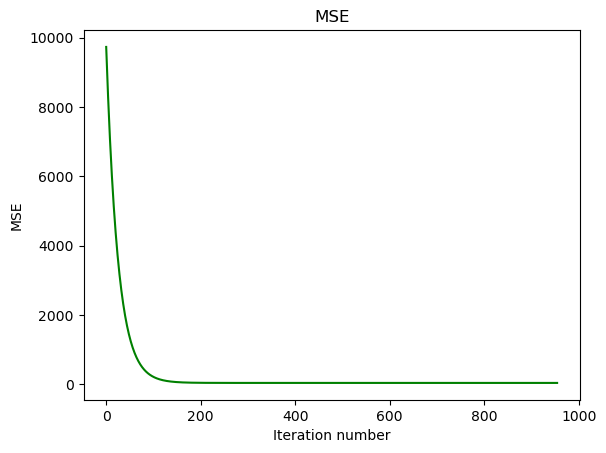

In [11]:
# визуализирую изменение функционала ошибки для градиентного спуска: 

plt.plot(range(len(errors_gd)), errors_gd, color='g', label='gd')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Реализация стохастического градиентного спуска:

In [12]:
%%time
# инициализирую начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgd = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом (+бесконечность)
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход стохастического градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерирую случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors_sgd.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_sgd[-1], 4)}')

Iteration #0: W_new = [ 7.79598898  0.94421413  1.37379859 10.73624656 -1.10724756 -2.99800329
 -3.73753639 -2.86956588], MSE = 8826.34
Iteration #100: W_new = [-1.80111149  6.39735561  1.41827479 71.29141801 -4.67847484 24.76525065
 25.30230626  0.44281067], MSE = 511.85
Iteration #200: W_new = [-1.01124154  2.73441031  0.62422405 88.11204634 -0.3686634  32.38215391
 30.67230914 -1.39089856], MSE = 46.4
Iteration #300: W_new = [ 8.98413789e-02  3.75520731e+00  1.05171284e+00  8.94641312e+01
 -5.62346762e-02  3.24158838e+01  3.22348641e+01 -1.39458737e+00], MSE = 39.34
Iteration #400: W_new = [ 0.59514746  3.51623976  0.81017792 89.95188935  0.52432923 32.63715255
 32.16747817 -1.09239139], MSE = 38.88
Iteration #500: W_new = [ 0.51323171  4.13831172  0.99535632 90.0966782  -0.42701364 30.58192728
 32.02448389  0.24549575], MSE = 40.44
Iteration #600: W_new = [ 1.84751683  3.97108828  1.07474791 89.86100646 -0.16118818 32.63129151
 32.34589086  0.40572694], MSE = 41.32
Iteration #700: 

Text(0, 0.5, 'MSE')

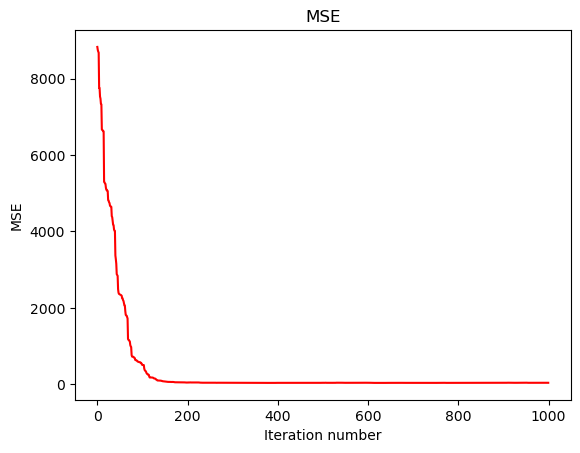

In [13]:
# визуализирую изменение функционала ошибки для стохастического градиентного спуска:

plt.plot(range(len(errors_sgd)), errors_sgd, color='r', label='sgd')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

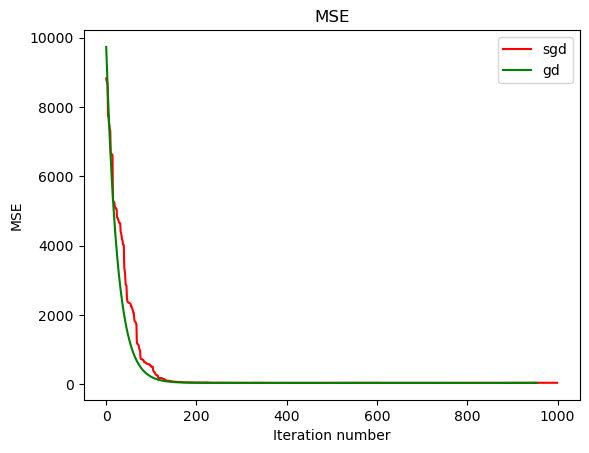

In [14]:
# строю графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов:

plt.plot(range(len(errors_sgd)), errors_sgd, label='sgd', color='r')
plt.plot(range(len(errors_gd)), errors_gd, label='gd', color='g')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(loc='best')

Вывод о разнице скорости сходимости каждого из методов: при одних и тех же параметрах (eta=0.01, max_iter = 1e3) видно, что зеленый график - градиентный спуск - быстрее (на меньшей итерации) уменьшает среднюю квадратическую ошибку. 